 # ARIMA MODEL

In [1]:
## load the library
import numpy as np
import pandas as pd
import sidetable
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats
import datetime
import statsmodels.api as sm
import itertools
warnings.filterwarnings('ignore')

In [2]:
## load the data
qcell = pd.read_csv('data-for-test2.csv')

In [3]:
qcell.info() ## We can understand total 200000 observations 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetime     200000 non-null  object 
 1   irradiance   200000 non-null  float64
 2   humidity     200000 non-null  float64
 3   temperature  200000 non-null  float64
 4   energy       200000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 7.6+ MB


In [4]:
qcell['datetime'] = pd.to_datetime(qcell["datetime"])
qcell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   datetime     200000 non-null  datetime64[ns]
 1   irradiance   200000 non-null  float64       
 2   humidity     200000 non-null  float64       
 3   temperature  200000 non-null  float64       
 4   energy       200000 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.6 MB


In [5]:
qcell.isnull().sum()

datetime       0
irradiance     0
humidity       0
temperature    0
energy         0
dtype: int64

## Used datatime as index

In [6]:
qcell = qcell.set_index('datetime')
qcell.index

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:05:00',
               '2016-01-01 00:10:00', '2016-01-01 00:15:00',
               '2016-01-01 00:20:00', '2016-01-01 00:25:00',
               '2016-01-01 00:30:00', '2016-01-01 00:35:00',
               '2016-01-01 00:40:00', '2016-01-01 00:45:00',
               ...
               '2018-01-07 16:50:00', '2018-01-07 16:55:00',
               '2018-01-07 17:00:00', '2018-01-07 17:05:00',
               '2018-01-07 17:10:00', '2018-01-07 17:15:00',
               '2018-01-07 17:20:00', '2018-01-07 17:25:00',
               '2018-01-07 17:30:00', '2018-01-07 17:35:00'],
              dtype='datetime64[ns]', name='datetime', length=200000, freq=None)

In [7]:
y = qcell['energy'].resample('MS').mean()

In [8]:
y['2016':]

datetime
2016-01-01    3.904538
2016-02-01    4.891215
2016-03-01    5.414549
2016-04-01    5.436141
2016-05-01    4.942498
2016-06-01    5.130799
2016-07-01    5.095013
2016-08-01    4.756268
2016-09-01    4.495068
2016-10-01    4.897244
2016-11-01    4.024585
2016-12-01    3.486136
2017-01-01    4.001334
2017-02-01    4.102330
2017-03-01    5.271957
2017-04-01    4.350471
2017-05-01    4.981641
2017-06-01    4.688328
2017-07-01    5.160704
2017-08-01    4.799400
2017-09-01    4.884722
2017-10-01    4.011493
2017-11-01    4.209559
2017-12-01    3.531289
2018-01-01    3.672612
Freq: MS, Name: energy, dtype: float64

## Energy vs. Date Trend Chart

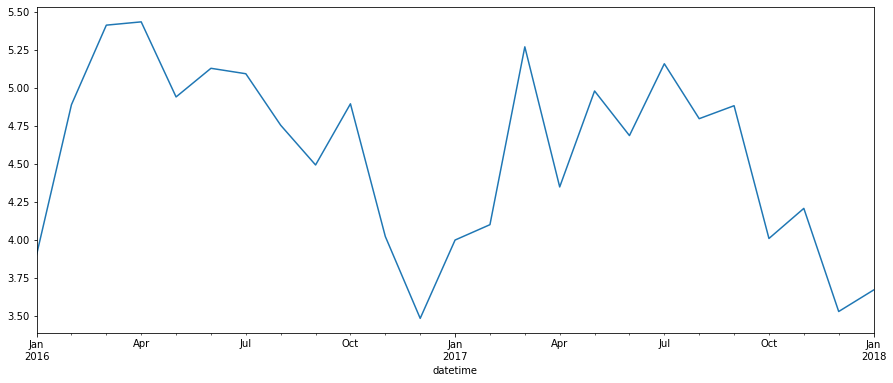

In [9]:
y.plot(figsize=(15, 6))
plt.show()

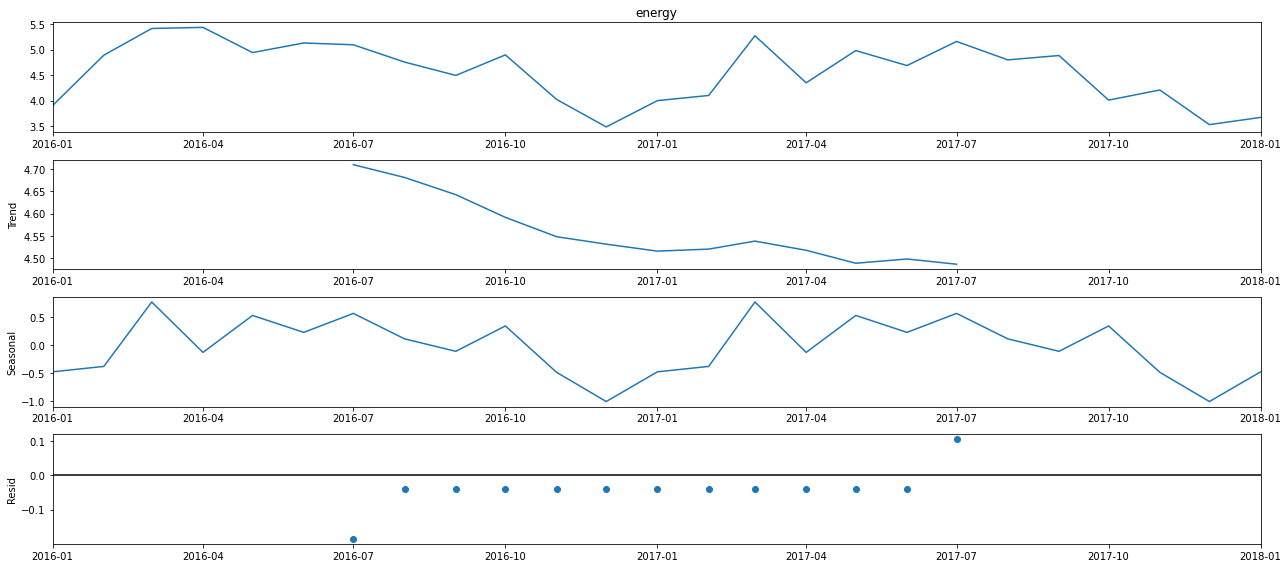

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [11]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


## Examine the p, d, q for ARIMA model

In [13]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:143.6641398283708
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:74.18413917966195
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:19.833878477529527
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:18.710916018064626
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:20.05505356407012
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-22.02297269120131
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:115.99815570978201
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:60.62056902331649
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:18.763198636516417
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:18.991076850621685
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:18.406399843442397
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-16.813947401693667
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:38.45573275618847
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:24.997343161173458
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:26.7588949114422
AR

## Recommend to use (1, 1, 0)x(1, 0, 1, 12)

## Fitting the ARIMA model

In [55]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7956      0.286     -2.780      0.005      -1.356      -0.235
ar.S.L12       0.5589      0.206      2.717      0.007       0.156       0.962
ma.S.L12    2.674e-08   3.05e-08      0.875      0.381   -3.31e-08    8.66e-08
sigma2         0.1493      0.064      2.343      0.019       0.024       0.274


## Examine Standarized residual, QQ plot, Density plot and time lag plots

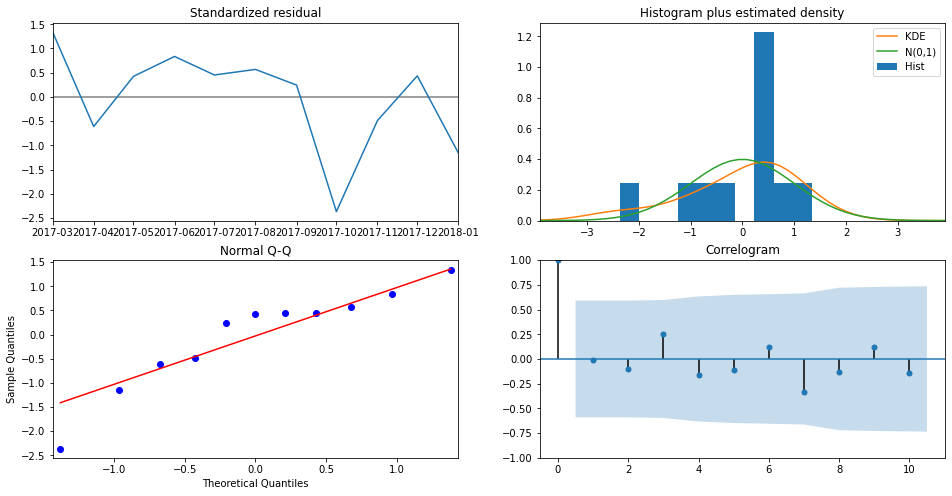

In [56]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Adopt one-step ahead Forecast

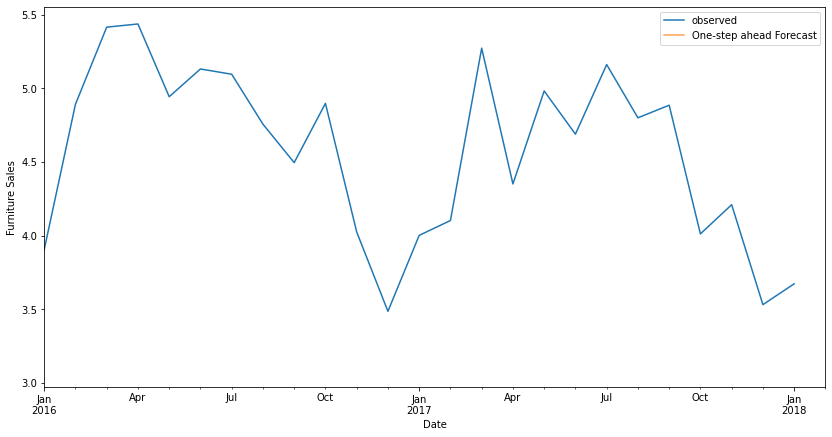

In [57]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-09'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

## Forecast the next 6 months energy

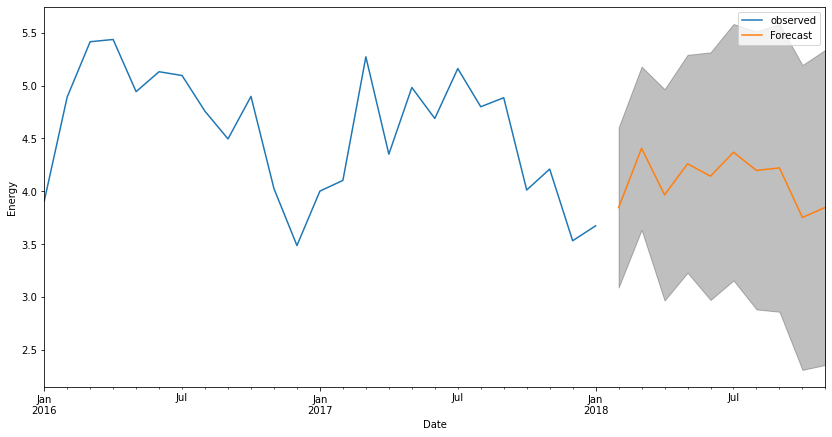

In [67]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Energy')
plt.legend()
plt.show()